# Lab 8: Rotational Motion &#0151; The Inclined Plane

_Group Members_ :

In this lab, you will explore how the mass distribution of a rigid body affects its moment of intertia through a parameter called the "geometric factor." You will begin by using computer simulation to determine how the geometric factor is determined by different mass density functions (density that varies by radius) in a solid disk. Using your understanding from this, you will then design and perform an experiment to determine the mass distributions of various unknown solid disks by using a ramp and motion capture software, Tracker.

In [ ]:
# Run this Python cell by selecting it and then pressing shift-enter
# Do not change anything in this cell
# These commands load the libraries for Python to use

import math
import numpy as np

# Part One: Calculating Geometric Factors Analytically

The geometric factor for many simple shapes can be caclulated by hand. In this section, we will calculate the geometric factor for discs with various distributions of mass.

Recall from your lecture that the moment of inertia for bulk objects is given by
$I = \int r^2 dm = \iiint r^2 \rho(\boldsymbol{\mathrm r}) dV,$ where $\rho(\boldsymbol{\mathrm r})$ is the volume mass density as a function of position $\boldsymbol{\mathrm r}$.  Here, $dV = dx dy dz = r^2 \sin \phi d\phi d \theta d r = r dr d \theta dz$ depending upon which coordinate system you are using. 


For objects whose mass distribution is independent of distance along the axis of rotation, we may use an _area_ mass density $\sigma(\boldsymbol{\mathrm r})$, such that
$I = \iint r^2 \sigma(\boldsymbol{\mathrm r}) dA.$  Here, $dA = dx dy = r dr d \theta $ depending upon which coordinate system you are using.  

For most disks (unless you have a disk that is density dependent upon $\theta$ around the axis of rotation), the integration over $\theta$ gives that the moment of intertia is $I = \iint r^2 \sigma(\boldsymbol{\mathrm r}) r dr d \theta = 2 \pi \int r^2 \sigma(\boldsymbol{\mathrm r}) r dr $, or $$I = 2 \pi \int r^3 \sigma(\boldsymbol{\mathrm r}) dr.$$ 
This one dimensional integral is only valid if the density is **not** dependent upon the rotation angle $\theta$.  You can compute your moment of inertia for a given density $\sigma(\boldsymbol{\mathrm r})$.

Recall as well that the geometric factor is defined as
$$
f_I = \dfrac{I}{M R^2},
$$
where $I$ is the moment of inertia, and $M$ and $R$ are the object's overall mass and radius. 



**<font color=A07A06>Problem 8.1: What is the geometric factor ($f_I$) for a disk with uniform mass density, if the axis of rotation passes through the center of the disk, perpendicular to the plane of the disk? Calculate the answer analytically.**

_Double click this cell to begin editing. Write your answer here._

What if you were trying to understand the moment of intertia of an object with non-uniform density?  An example of a sphere with non-uniform density is the Earth, with different densities for each of the layers.  

Now using disks, what would happen if a disk was not uniform in density across $r$?  

**<font color=A07A06>Problem 8.2: Now consider a disk with area mass density which increases linearly with increasing radius (_i.e._ mass density $\sigma = \alpha  r $, where $\alpha$ is a positive constant). Will the geometric factor be greater or lesser than what you found above? (Think about whether the mass is distributed more away from the axis of rotation or closer to the axis of rotation on average.) After thinking about this qualitative answer, calculate the geometric factor analytically.**

_Double click this cell to begin editing. Write your answer here._

**<font color=A07A06>Problem 8.3: Now consider a disk with area mass density which _decreases_ linearly with increasing radius (_i.e._ mass density $\sigma = \alpha r + C$, where $\alpha$ is now a _negative_ constant and $C$ is a positive constant). Calculate the geometric factor analytically.**

_Double click this cell to begin editing. Write your answer here._

**<font color=A07A06>Problem 8.4: Describe what the geometric factor term physically represents.**

_Double click this cell to begin editing. Write your answer here._

# Part Two: Calculating Geometric Factors Numerically

Sometimes, it is not possible to calculate a geometric factor analytically. In these cases, it is possible to find the answer numerically. That is, we can write computer code to find the geometric factor. In this section, we will numerically calculate the geometric factors from Part One and compare the numerical method.

Consider a disk of unit radius ($R=1$). We will use numerical integration to find the moment of inertia (and thus the geometric factor), based on the particular mass density (defined in the code).

Remember, integration is just a summation over very small elements ($dr$).  In otherwords, integration is a summation with infinitely small elements ($dr$). 

Imagine the disk is made up of very thin rings situated at different distances from the center.

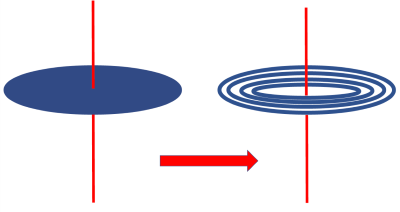

The width of a ring is taken to be very small, $\delta r$.

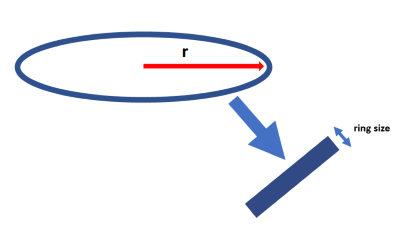

The moment of inertia calculation $\int_M r^2 dm$ is approximated by $\sum \delta m \ r^2$.
We are considering 2-dimensional systems, so for one thin ring at radius r, of width $\delta r$ and the area mass density $\sigma(r)$, we find that $I = \sum \delta m \ r^2$ where $\delta m = \sigma(r) 2 \pi r \delta r$ and geometric factor $f_I = \frac{I}{M_{total}r^2}$ where $M_{total}=\sum \delta m$.
    
For the summation we define a step size $\delta r$ such that sum of all steps is 1 (as the radius of the ring is 1).

Already coded below is the case of constant mass density, which represents a uniform solid disk. Read through the code and make sure you understand it!

**<font color=004D40>Problem 8.5: Read through the code below (code task 1), and predict what it will calculate.  Describe what the code does below.**

_Double click this cell to begin editing. Write your answer here._

**<font color=004D40>Code Task 8.1: Without editing, run the code below to find the geometric factor for a solid disc with uniform mass density.**

In [ ]:
# Run this Python cell by selecting it and then pressing shift-enter
# Do not change anything in this cell
# These commands define a function which performs the numerical integration


def compute_geometric_factor(mass_density, radius=1, dr=0.0001):
    N = radius/dr

    moment_of_inertia = 0
    total_mass = 0

    #Calculation of total mass of the ring.
    for i in np.arange(0,N):
        r = i*dr
        dm = mass_density(r)*2*np.pi*r*dr
        total_mass = total_mass + dm
        moment_of_inertia = moment_of_inertia + dm*(r**2)

    geometric_factor = moment_of_inertia/(total_mass*(radius**2))
    
    return geometric_factor

In [ ]:
def mass_density(r):
    sigma = 5  #Mass density formula
    return sigma

f = compute_geometric_factor(mass_density, radius=1, dr=0.0001)
print('The computed geometric factor is {}'.format(f))

**<font color=004D40>Problem 8.6: How does your numerically calculated value compare to the value you calculated in Question 1?**

_Double click this cell to begin editing. Write your answer here._

**<font color=004D40>Problem 8.7: Is your geometric factor dependent upon the constant mass density value?  How did you determine this?**

_Double click this cell to begin editing. Write your answer here._

**<font color=1E88E5>Code Task 8.2: The code from Code Task 1 has been copied below.  Modify it by changing the mass density from a constant value to linearly increasing ($5r$).**

In [ ]:
def mass_density(r):
    sigma = 5 # <--- EDIT here
    return sigma

f = compute_geometric_factor(mass_density, radius=1, dr=0.0001)
print('The computed geometric factor is {}'.format(f))

**<font color=1E88E5>Problem 8.8: What is the geometric factor found by your code? Compare this numerical result with the analytical result found in Question 2.**

_Double click this cell to begin editing. Write your answer here._

**<font color=1E88E5>Code Task 8.3: The code from Code Task 1 has been copied below.  Modify it by changing the mass density from a constant value to linearly _decreasing_ ($5-5r$).**

In [ ]:
def mass_density(r):
    sigma = 5 # <--- EDIT here
    return sigma

f = compute_geometric_factor(mass_density, radius=1, dr=0.0001)
print('The computed geometric factor is {}'.format(f))

**<font color=1E88E5>Problem 8.5: What is the geometric factor found by your code? Compare this numerical result with the analytical result found in Question 3.**

_Double click this cell to begin editing. Write your answer here._

**<font color=D81B60>Problem 8.6: Now consider a disc with a mass density that increases _exponentially_ with distance (for example, mass density $\exp(5r)$). In this case, the mass distribution increases more rapidly than in the linear case. Do you expect the geometric factor for this disc to be greater or lesser than for the linear case? Explain in terms of where the majority of the mass is distributed relative to the axis of rotation.**

_Double click this cell to begin editing. Write your answer here._

**<font color=D81B60>Problem 8.7: Similarly, consider a disc with a mass density that _decreases_ exponentially with distance (for example, mass density $\exp(-5r)$). In this case, the mass distribution decreases more rapidly than in the linear case. Do you expect the geometric factor for this disc to be greater or lesser than for the linear case? Explain in terms of where the majority of the mass is distributed relative to the axis of rotation.**

_Double click this cell to begin editing. Write your answer here._

**<font color=D81B60>Code Task 8.4: Run code below for the exponentially increasing mass density, $\exp(5x)$.  Then, edit the mass density for the exponentially decreasing mass density, $\exp(-5x)$.**

In [ ]:
def mass_density(r):
    sigma = np.exp(5*r) # <--- EDIT here
    return sigma

f = compute_geometric_factor(mass_density, radius=1, dr=0.0001)
print('The computed geometric factor is {}'.format(f))

**<font color=D81B60>Problem 8.8: Note down the numerical results for the geometric factors of exponentially increasing and exponentially decreasing mass densities. Are these results consistent with your predictions? (Refer to Questions 6-7.)**

_Double click this cell to begin editing. Write your answer here._

# Culminating Assessment Task

Now that you have seen how the mass distribution of a rigid object can affect its geometric factor, you will use what you have learned to make statements about an object's mass distribution by making measurements of its geometric factor.

You are provided with a ramp and a selection of disks with varying mass distributions. Your goal is to use data collected from Tracker to calculate the geometric factor of several disks. 

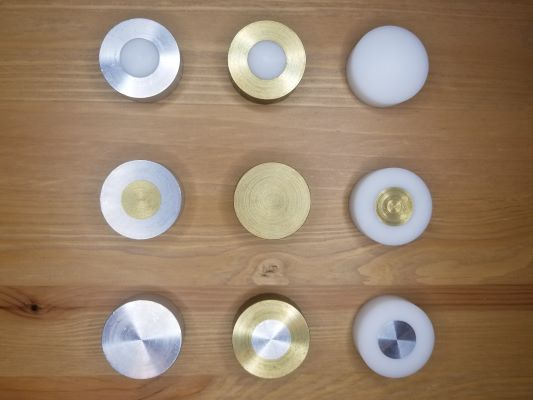

The disks have a center disk and an outer ring, as seen in the nine different variations in the photo above.  The materials used are either brass ($\rho_{brass} = 8.73 g/cm^3$), aluminium ($\rho_{aluminium} = 2.7 g/cm^3$), or nylon ($\rho_{nylon} = 1.15 g/cm^3$).  These have been painted so that you can not visually identify the material.

Now that you have seen how the mass distribution of a rigid object can affect its geometric factor, you will use what you have learned to make statements about an object's mass distribution by making measurements of its geometric factor.

You are provided with a ramp and a selection of disks with varying mass distributions. Your goal is to use data collected from Tracker to calculate the geometric factor of several disks. 

The total kinetic energy can be written as $K = \frac{1}{2} M v^2 + \frac{1}{2} I \omega^2$ for an object that is translating and rotating.  For objects that are rolling without slipping, $v = \omega R$, the kinetic energy becomes $K = \frac{1}{2} M v^2 + \frac{1}{2} \frac{I}{R^2} v^2 = \left(1  +\frac{I}{M R^2} \right) \frac{1}{2}  M  v^2$   


This becomes a useful result for the kinetic energy of a rolling disc:
$$
K = \frac{1}{2} (1+f_I) M v^2,
$$
where $f_I$ is the geometric factor, $M$ is the mass of the disc, and $v$ is its translational velocity. 


You will design an experiment to solve for $f_I$.  Consider how you might use the lab equipment, ramp, and Tracker to find the other values. Keep in mind that the kinetic energy at any point on a ramp is equal to the change in gravitational potential energy, discounting either friction or slipping.

**<font color=green>Note: For the online version of this class, you will be given a video for each of the 9 disks rolling down a ramp.  You will use these videos to complete the lab below. You can find the videos [at this link](https://drive.google.com/drive/folders/1YYpBWYwprygm7ZyjfkmL-UqI2yxlH_-l?usp=sharing). <font color=red>Note that these videos were taken in slow-motion so the frame rate should be set to 240.**

**<font color=A07A06>Problem 8.9: Explain your general procedure for experimentally determining the geometric factor of a single disk with unknown mass distribution.  Make sure to explain how you will determine the different parameters you will use to calculate the geometric factor.**

_Double click this cell to begin editing. Write your answer here._

**<font color=004D40> Problem 8.10: Record the identifying numbers of each disk, the parameters you are using to calculate the geometric factor, and your experimentally determined geometric factor here. Try to do _at least_ three different disks.**




| Disk #  | Parameter 1    |   Parameter 2    |   Parameter 3    |Geometric Factor  |
| --------| -------------- |   ---------      |   ---------      |   ---------      |
| #       |     ???        |      ???         |       ???        |      ???         |
| #       |     ???        |      ???         |       ???        |      ???         |
| #       |     ???        |      ???         |       ???        |      ???         |
| #       |     ???        |      ???         |       ???        |      ???         |

_You can use this cell to explain what you did and to show a sample calculation of your geometric factor for one of your disks._

**<font color=1E88E5> Problem 8.11: What can you state about the mass distribution of each disk? You can answer this question by comparing the geometric factors of each disk to a solid disk of radius $R$, a thin circular shell of radius $R$, and to each other's geometric factors. What do you think the composition of each disk might be?  Can you determine the relative mass density of each disk?**

_Double click this cell to begin editing. Write your answer here._

**<font color=D81B60> Problem 8.12: Now that you have finished the Culmination Assessment Task, is there anything you would do differently if you had to do it again? How might your procedure be improved to account for any sources of error or uncertainty you think came up?**
    
**<font color=green>Additionally, for the online version, is there a different way you would have recorded your data in person?**  

_Double click this cell to begin editing. Write your answer here._

### <center>You're done! Submit your lab per the following instructions.<font color=white><#!S!#>

* Save this file with the lab number and group number to submit to canvas, e.g. `group01_lab02.ipynb`. 
* You only need to submit one file as a group to the canvas assignment and it will count for all group members.
* The group recorder should still send the worksheet to their group members so they have a copy.
* Save the file as a html file. You can do this by opening the `File` tab on the top left corner of Jupyter, then select `Download as > html (.html)`
* Submit both the .ipynb and .html files to canvas under the `Lab 8: Rotational Motion - Inclined Plane` assignment.